In [25]:
import pandas as pd
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import keras

In [26]:
def plot_pred(img_, output):
    fig, ax = plt.subplots(figsize=(18, 20))
    imgplot = ax.imshow(img_)
    for i in range(len(output)-1):
        ax.scatter(int(output[i]), int(output[i+1]), 50)
    plt.title('Prediction')
    plt.show()

In [40]:
def predict(path_to_model, path_to_img, path_to_scaler='scaler.pickle'):

        model = keras.models.load_model(path_to_model)
        np_image = cv2.imread(path_to_img)
        np_image_ = np.array(np_image).astype('float32') / 255
        np_image_ = transform.resize(np_image_, (1,dim[0], dim[1], 3))

        tmp = model.predict(np_image_)
        output = self.detransform(tmp, path_to_scaler)
        print(output)
        plot_pred(np_image, output)

def detransform( output, path_to_scaler):
        with open(path_to_scaler, 'rb') as f:
            scaler = pickle.load(f)
        output = scaler.inverse_transform(output)
        return output


In [28]:
weights = '/home/hikkav/PycharmProjects/makeProjectData/weights/yolov3-wider_16000.weights'

In [29]:
cfg = '/home/hikkav/PycharmProjects/makeProjectData/cfg/yolov3-face.cfg'

In [30]:
abs_path = '/home/hikkav/hack/data/landmarks/train_images/'

In [31]:
df = pd.read_csv('/home/hikkav/GlobalLogicNet/data_analysis/new_data.csv')

In [32]:
df.head()

,im_name,height,width,x0,y0,x1,y1,x2,y2,x3,...,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16
0,/home/hikkav/GlobalLogicNet/new_data/0000.jpg,1242,2208,33.078652,60.556054,37.393258,70.313901,35.595506,51.946188,44.584270,...,71.011236,55.390135,32.719101,82.941704,37.393258,78.062780,60.764045,85.811659,37.393258,84.663677
1,/home/hikkav/GlobalLogicNet/new_data/0001.jpg,1242,2208,69.848564,68.721311,67.509138,76.852459,44.783290,49.836066,60.825065,...,90.402089,58.491803,47.122715,84.983607,66.506527,83.672131,80.877285,89.180328,64.167102,90.491803
2,/home/hikkav/GlobalLogicNet/new_data/0002.jpg,1242,2208,60.126801,57.967816,60.864553,69.443678,37.625360,51.200000,52.380403,...,83.181556,53.259770,45.002882,85.627586,60.126801,80.036782,77.095101,86.510345,59.389049,88.864368
3,/home/hikkav/GlobalLogicNet/new_data/0003.jpg,1242,2208,60.022599,57.379310,60.384181,69.149425,38.327684,51.494253,52.790960,...,81.717514,52.965517,45.197740,85.039080,60.022599,79.154023,77.016949,86.216092,59.661017,88.275862
4,/home/hikkav/GlobalLogicNet/new_data/0004.jpg,1242,2208,47.188940,60.423892,49.843318,72.262042,29.198157,55.491329,44.534562,...,73.880184,52.285164,36.866359,91.252408,50.433180,83.360308,69.898618,89.032755,51.023041,93.718690


In [17]:
def crop(image, landmarks):
    param = 60
    blob = cv2.dnn.blobFromImage(frame, 1 / 255, (416, 416),
                                             [0, 0, 0], 1, crop=False)
    net.setInput(blob)
    outs = net.forward(get_outputs_names(net))
    faces, _, __ = post_process(frame, outs, 0.7, 0.8)
    crop_faces = [(faces[i][0]-param, faces[i][1]-param, faces[i][2] + faces[i][0]+param, faces[i][3] + faces[i][1]+param) for i in
                  range(len(faces))]
     
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    crop_faces = [(faces[i][0]-param, faces[i][1]-param, faces[i][2] + faces[i][0]+param, faces[i][3] + faces[i][1]+param) for i in
                  range(len(faces))]
    img = Image.fromarray(np.asarray(img)).crop(crop_faces[0]).convert('RGB')
    landmarks = [(i[0]-crop_faces[0][0], i[1]-crop_faces[0][1]) for i in landmarks]
    
    return img, landmarks

    

In [11]:
frame, _ = crop(frame, landmarks)

NameError: name 'frame' is not defined

In [24]:
df['im_name'] = df['im_name'].apply(lambda x: abs_path+x)

In [33]:
frame = df['im_name'].values[1]

In [34]:
frame

'/home/hikkav/GlobalLogicNet/new_data/0001.jpg'

In [35]:
frame = cv2.imread(frame)

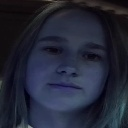

In [36]:
display(Image.fromarray(frame))

In [37]:
landmarks1 = df[df.im_name==df.im_name.values[1]]

In [38]:
landmarks = list(zip(
                landmarks1[['x'+str(i) for i in range(0,17,1)]].as_matrix().flatten(),landmarks1[['y'+str(i) for i in range(0,17,1)]].as_matrix().flatten(),))

/home/hikkav/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


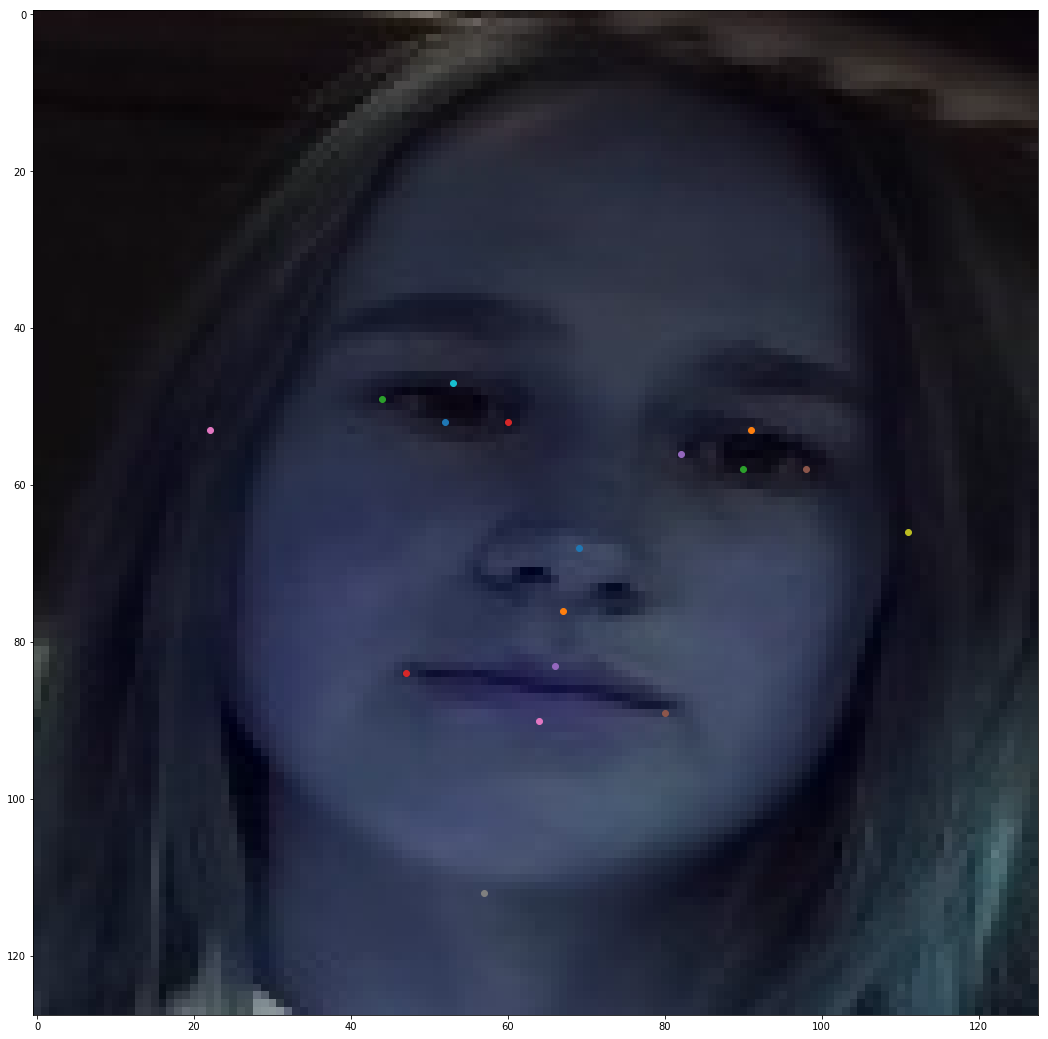

In [39]:
fig, ax = plt.subplots(figsize=(18, 20))
imgplot = ax.imshow(frame)
for i in landmarks :
    ax.scatter(int(i[0]),int(i[1]))
plt.show()

In [101]:
IMG_WIDTH = 416
IMG_HEIGHT = 416

In [102]:
net = cv2.dnn.readNetFromDarknet(cfg, weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [103]:
def get_outputs_names(net):
        layers_names = net.getLayerNames()
        return [layers_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [104]:
class_list = ['people']

In [105]:
def post_process(frame, outs, conf_threshold, nms_threshold):
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only
    # the ones with high confidence scores. Assign the box's class label as the
    # class with the highest score.
    confidences = []
    boxes = []

    people_boxes = []
    center = []
    class_ids = []
    if True:

        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > conf_threshold:
                    center_x = int(detection[0] * frame_width)
                    center_y = int(detection[1] * frame_height)
                    width = int(detection[2] * frame_width)
                    height = int(detection[3] * frame_height)
                    left = int(center_x - width / 2)
                    top = int(center_y - height / 2)
                    confidences.append(float(confidence))
                    boxes.append([left, top, width, height])
                    center.append([center_x, center_y])
                    class_ids.append(class_id)

    # Perform non maximum suppression to eliminate redundant
    # overlapping boxes with lower confidences.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold,
                               nms_threshold)

    for i in indices:
        i = i[0]
        box = boxes[i]

        people_boxes.append(box)

    return people_boxes, class_ids, indices

In [106]:
blob = cv2.dnn.blobFromImage(frame, 1 / 255, (IMG_WIDTH, IMG_HEIGHT),
                                             [0, 0, 0], 1, crop=False)
net.setInput(blob)
outs = net.forward(get_outputs_names(net))
faces, _, __ = post_process(frame, outs, 0.7, 0.8)

In [107]:
img_ = None

In [108]:
faces

[[985, 388, 257, 320], [318, 668, 165, 176]]

In [109]:
param = 60

In [110]:
img = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

crop_faces = [(faces[i][0]-param, faces[i][1]-param, faces[i][2] + faces[i][0]+param, faces[i][3] + faces[i][1]+param) for i in
                  range(len(faces))]


In [111]:
img = Image.fromarray(np.asarray(img)).crop(crop_faces[0]).convert('RGB')

In [112]:
img.height

440

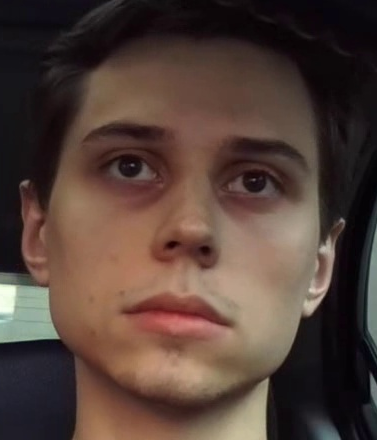

In [113]:
display(img)

In [114]:
def resize_image_landmarks(image, new_height, new_width, landmarks):
    cur_height = image.height
    cur_width = image.width
    image = image.resize((new_height, new_width))
    for i in range(len(landmarks)):
       
        print(cur_width / new_width * landmarks[i][0])
        landmarks[i] = (
            new_width/ cur_width * landmarks[i][0],
            new_height / cur_height * landmarks[i][1]
            )
    return image, landmarks

In [115]:
landmarks1 = df[df.im_name==df.im_name.values[38]]

In [116]:
landmarks = list(zip(
                landmarks1[['x'+str(i) for i in range(0,17,1)]].as_matrix().flatten(),landmarks1[['y'+str(i) for i in range(0,17,1)]].as_matrix().flatten(),))

/home/hikkav/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [117]:
landmarks = [(i[0]-crop_faces[0][0], i[1]-crop_faces[0][1]) for i in landmarks]

In [118]:
img, lands = resize_image_landmarks(img, 300, 300, landmarks)

237.51
231.22666666666666
131.95
197.29666666666665
284.00666666666666
348.09666666666664
56.55
207.35
407.15999999999997
165.88
161.48166666666665
319.1933333333333
317.93666666666667
157.08333333333331
228.7133333333333
285.2633333333333
219.91666666666666


In [119]:
img.height

300

In [120]:
lands

[(150.3978779840849, 152.72727272727272),
 (146.41909814323606, 177.27272727272725),
 (83.55437665782493, 115.9090909090909),
 (124.93368700265252, 121.36363636363636),
 (179.84084880636604, 126.81818181818181),
 (220.42440318302386, 128.86363636363635),
 (35.80901856763926, 126.13636363636363),
 (131.2997347480106, 275.45454545454544),
 (257.82493368700267, 148.63636363636363),
 (105.03978779840848, 104.99999999999999),
 (102.25464190981432, 122.72727272727272),
 (202.12201591511936, 114.54545454545453),
 (201.3262599469496, 132.27272727272725),
 (99.46949602122015, 212.72727272727272),
 (144.82758620689654, 203.18181818181816),
 (180.6366047745358, 220.9090909090909),
 (139.25729442970822, 229.09090909090907)]

In [121]:
img_ = np.array(img)

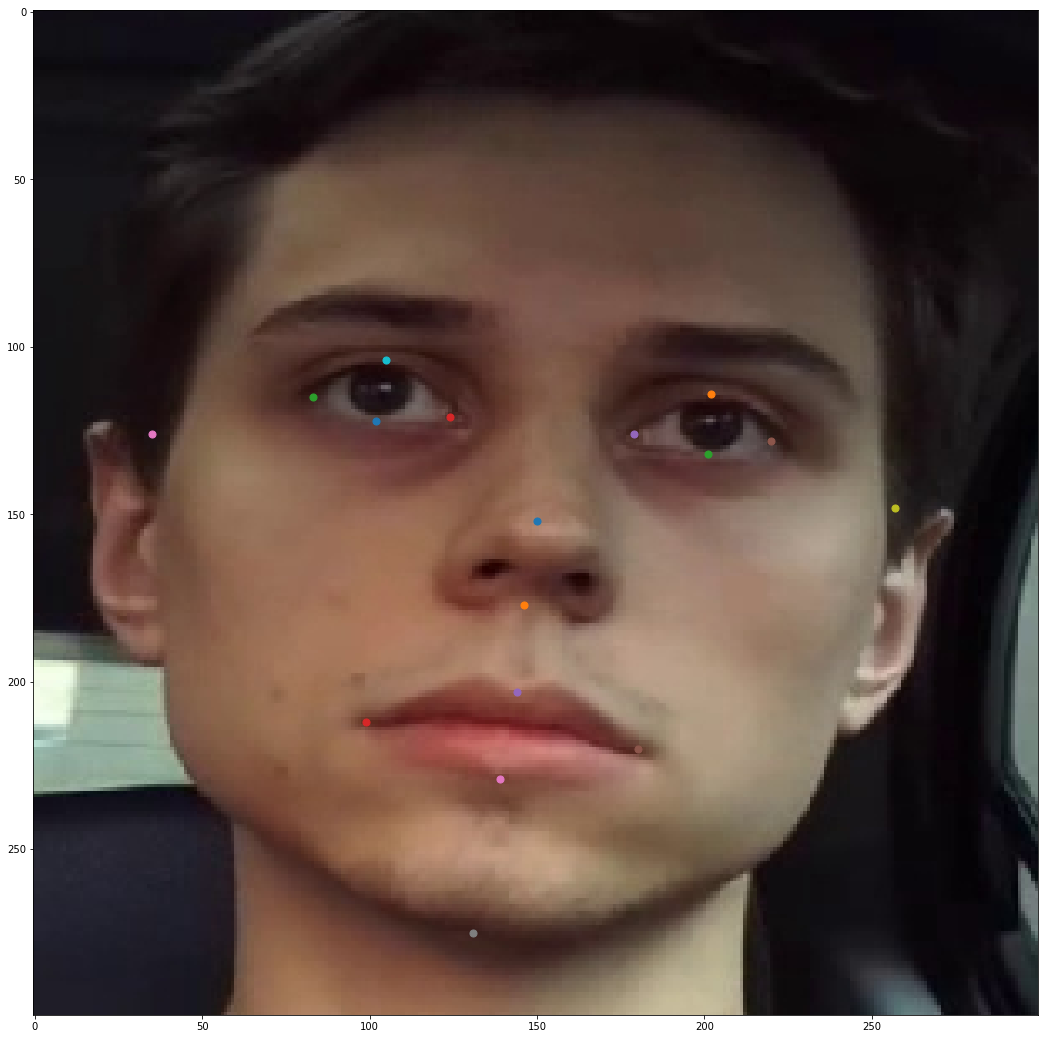

In [122]:
fig, ax = plt.subplots(figsize=(18, 20))
imgplot = ax.imshow(img_)
for i in lands :
    ax.scatter(int(i[0]),int(i[1]), 50)
plt.show()